# **資料科學概論期末專案**
經濟三甲 A105260073 簡妤安 、A105260061 林育鵬 、A105260081 邱勁惟 、A10526010101周子盛、A105260019 郭家軒


1.   研究問題


*   在台灣解嚴以後，雖然進行了許多次的選舉，成為民主社會，但在民國107年前只舉行了兩次全國性的公投，且提案數都為二~四個左右，在今年的九合一選舉，第一次綁上了10個公投，在政府宣導不佳的情況下，且過多的公投數導致人民對於每個提案的關注度都不一，造成在沒有充分了解其背景的情形下，人民就有權力來對未來的修法或施政方向提出意見，本研究想要探討在城市地區與鄉下地區，是否因為其生活習慣的不同，而對公投的提案表達意見會有所不同。


2.   研究方法


*   使用python將資料輸出成視覺化圖表來觀察，由於資料量過大難以直接看出差異，所以將資料輸出成圖表來以便觀察，分為各投票所在十個公投案同意不同意數量，十個公投案總同意及不同意票，及十個公投案在各開票所同意不同意票的散布圖，能知道城市及鄉下各佔同意票或不同意票的比率，方便比較城市地區及鄉下地區是否有投票差異。

*   註:框框為中文字跑不出來






In [0]:
import pandas as pd
referendum = pd.read_csv("referendum.csv")
referendum.head()

,admin_region,ref_num,district,village,office,agree,disagree,invalid_votes,issued_votes,remaining_votes
0,台北市,第7案,北投區,建民里,1,556,178,68,802,511
1,台北市,第7案,北投區,建民里,2,582,237,45,867,536
2,台北市,第7案,北投區,建民里,3,427,184,55,666,415
3,台北市,第7案,北投區,文林里,4,510,164,52,726,483
4,台北市,第7案,北投區,文林里,5,530,188,54,772,554


In [0]:
referendum.tail()

,admin_region,ref_num,district,village,office,agree,disagree,invalid_votes,issued_votes,remaining_votes
158865,連江縣,第16案,北竿鄉,后沃村、橋仔村、塘岐村,5,522,240,55,817,698
158866,連江縣,第16案,北竿鄉,坂里村、白沙村、芹壁村,6,185,96,12,293,317
158867,連江縣,第16案,莒光鄉,田沃村、西坵村、青帆村,7,224,94,20,338,360
158868,連江縣,第16案,莒光鄉,大坪村、福正村,8,278,130,37,445,338
158869,連江縣,第16案,東引鄉,樂華村、中柳村,9,354,200,26,580,558


In [0]:
no16=referendum[referendum["ref_num"]=="第16案"]
no16agree=no16["agree"].sum()
no16disagree=no16["disagree"].sum()

In [0]:
referendum["ref_num"].unique()

array(['第7案', '第8案', '第9案', '第10案', '第11案', '第12案', '第13案', '第14案',
       '第15案', '第16案'], dtype=object)

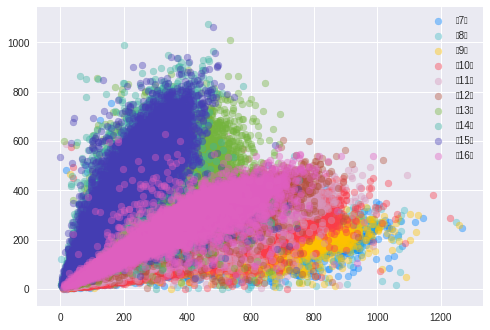

In [0]:
import matplotlib.pyplot as plt
hex_colors = ["#0084ff", "#44bec7", "#ffc300", "#fa3c4c", "#d696bb", "#B4523D", "#74B43D",
             "#3DB4A2", "#463DB4", "#E05FC1"]
continents = referendum["ref_num"].unique()
for col, cont in zip(hex_colors, continents):
  subset_df = referendum[referendum["ref_num"] == cont]
  plt.scatter(subset_df["agree"], subset_df["disagree"], color=col, alpha=0.4, label=cont)

plt.legend()
plt.show()

In [0]:
ref = referendum.groupby("ref_num")
agree = ref["agree"].sum()
disagree = ref["disagree"].sum()
agree.values
agree.index
disagree.index
disagree.values

array([2907429, 3419624, 4072471, 5774556, 6949697, 6805171, 4014215,
       2109157, 2346316, 2231425])

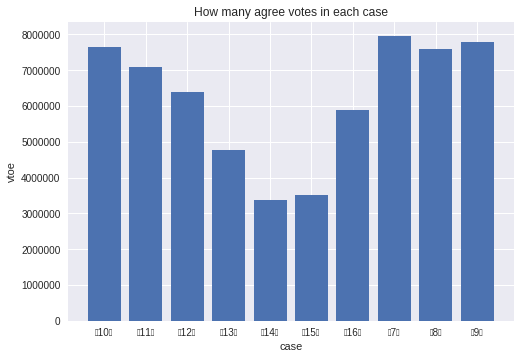

In [0]:
agree_len = len(agree.values)
plt.bar(range(agree_len), agree.values)
plt.xticks(range(agree_len), agree.index)
plt.title("How many agree votes in each case")
plt.xlabel("case")
plt.ylabel("vtoe")
plt.show()

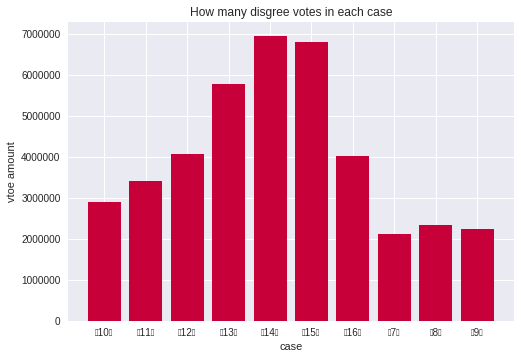

In [0]:
disagree_len = len(disagree.values)
plt.bar(range(disagree_len), disagree.values, color="#C70039")
plt.xticks(range(disagree_len), disagree.index)
plt.title("How many disgree votes in each case")
plt.xlabel("case")
plt.ylabel("vtoe amount")
plt.show()

In [0]:
issued = ref["issued_votes"].sum()
issued.index
issued.values


array([11029213, 11015307, 11019738, 11046919, 10945367, 10936756,
       10838848, 10785846, 10775632, 10785246])

IndexError: ignored

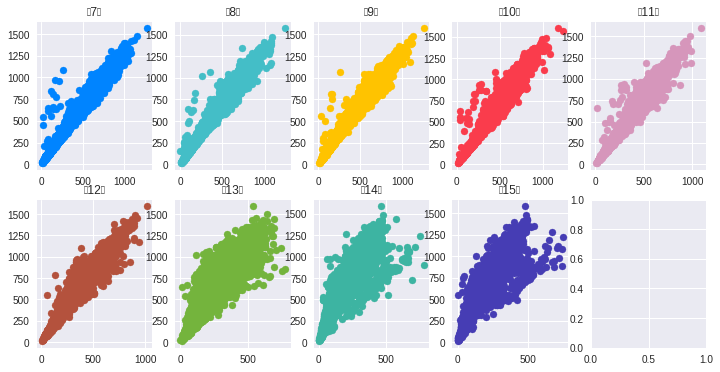

In [0]:
import matplotlib.pyplot as plt
figure, axis = plt.subplots(2, 5, figsize=(12, 6))
row_indice = [0, 0, 0, 0, 0, 1, 1, 1, 1, 4]
col_indice = [0, 1, 2, 3, 4, 0, 1, 2, 3, 4]
hex_colors = ["#0084ff", "#44bec7", "#ffc300", "#fa3c4c", "#d696bb", "#B4523D", "#74B43D",
             "#3DB4A2", "#463DB4", "#E05FC1"]
aa = referendum["ref_num"].unique()
for ridx, cidx, cont, col in zip(row_indice, col_indice, aa, hex_colors):
  subset_df = referendum[referendum["ref_num"] == cont]
  axis[ridx, cidx].scatter(subset_df["agree"], subset_df["issued_votes"], color=col)
  axis[ridx, cidx].set_title(cont)
axis[1, 2].set_visible(False)
plt.tight_layout()
plt.show()